# Traveling Salesperson Problem

Traveling Salesperson Problem (TSP) is a typical transportation problem. The goal is to find a route that travels through all the cities and return to the point of departure with minumum cost. 

## Example 1
### Problem Statement
In this problem, we are going to find a solution of the route that starts from one node and covers all the nodes and go back to that node, with minimum distance. The distance from node $i$ to node $j$ is $c_{ij}$, and the position of each node are listed in the table. **What is the length of the TSP solution?**


<img src="./TSP.png" style="zoom:60%" />

### Decision Variables 
$x_{ij}$ is either 0 or 1, indicates which path to go  
$x_{12}$ = whether or not go through the path from node $1$ to node $2$  
$x_{21}$ = whether or not go through the path from node $2$ to node $1$  
$x_{13}$ = whether or not go through the path from node $1$ to node $3$  
$x_{31}$ = whether or not go through the path from node $3$ to node $1$  
$x_{14}$ = whether or not go through the path from node $1$ to node $4$  
$x_{41}$ = whether or not go through the path from node $4$ to node $1$  
$x_{23}$ = whether or not go through the path from node $2$ to node $3$  
$x_{32}$ = whether or not go through the path from node $3$ to node $2$   
$x_{24}$ = whether or not go through the path from node $2$ to node $4$   
$x_{42}$ = whether or not go through the path from node $4$ to node $2$  
$x_{34}$ = whether or not go through the path from node $3$ to node $4$  
$x_{43}$ = whether or not go through the path from node $4$ to node $3$  

### Objective function
$\min \sum x_{ij}*c_{ij}$

### Constraints
- Only one trip going out of each city

City 1: $x_{12}+x_{13}+x_{14} = 1$  
City 2: $x_{21}+x_{23}+x_{24} = 1$  
City 3: $x_{31}+x_{32}+x_{34} = 1$  
City 4: $x_{41}+x_{42}+x_{43} = 1$  


- Only one trip coming into each city 

City 1: $x_{21}+x_{31}+x_{41} = 1$  
City 2: $x_{12}+x_{32}+x_{42} = 1$  
City 3: $x_{13}+x_{23}+x_{43} = 1$  
City 4: $x_{14}+x_{24}+x_{34} = 1$ 



- Subtour elimination constraints 

2-node subtour elimination: $x_{ij}+x_{ji} \leq 1 $  
3-node subtour eliminations=: $x_{ij}+x_{jk}+x_{ki} \leq 2 $  
$i, j, k$ $\in$ {1,2,3,4},  $i \neq j \neq k$



- Integer constraints  

$x_{ij}$ $\in$ {0,1}

### Solution with Pulp in Python

In [2]:
# Loading packages
import numpy as np
from pulp import *
import math

Calculate distances between each centers:

In [3]:
def Euclidean(i,j):
    return math.sqrt((i[0]-j[0])**2+(i[1]-j[1])**2)

In [4]:
open_centers = [(15,15),(15,8),(10,1),(30,2)]
distances = {}
for i in range(len(open_centers)):
    for j in range(len(open_centers)):
        distances[i,j]=Euclidean(open_centers[i],open_centers[j])      

In [5]:
print(distances)

{(0, 0): 0.0, (0, 1): 7.0, (0, 2): 14.866068747318506, (0, 3): 19.849433241279208, (1, 0): 7.0, (1, 1): 0.0, (1, 2): 8.602325267042627, (1, 3): 16.15549442140351, (2, 0): 14.866068747318506, (2, 1): 8.602325267042627, (2, 2): 0.0, (2, 3): 20.024984394500787, (3, 0): 19.849433241279208, (3, 1): 16.15549442140351, (3, 2): 20.024984394500787, (3, 3): 0.0}


Define the problem with decision variables and constraints:

In [4]:
model = LpProblem("Traveling salesperson problem",LpMinimize)
x=LpVariable.dicts('x',((i,j) for i in range(len(open_centers)) for j in range(len(open_centers)) if i!=j), cat = 'Binary')

#Adding Constraints
for i in range(len(open_centers)):
    model += pulp.lpSum([x[i,j] for j in range(len(open_centers)) if i!=j]) == 1
for j in range(len(open_centers)):
    model += pulp.lpSum([x[i,j] for i in range(len(open_centers)) if i!=j]) == 1

from itertools import combinations 
for k in range(2,len(open_centers)):
    for subtour in combinations(range(len(open_centers)),k):
        model += pulp.lpSum(x[i,j] for i in subtour for j in subtour if i!=j) <= k-1

D:\software\anaconda\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Set objective function:

In [5]:
#Objective Function
model += pulp.lpSum([distances[i,j]*x[i,j] for i in range(len(open_centers)) for j in range(len(open_centers)) if i!=j])
model.solve()

1

Show the optimal route and cost:

In [6]:
X = np.zeros((len(open_centers))*(len(open_centers)))
i = 1
X[0]=0
for variable in model.variables():
    #print ("{} = {}".format(variable.name, variable.varValue))
    X[i]= variable.varValue
    i += 1
    if i%(len(open_centers)+1)==0:
        X[i]=0
        i += 1
X = np.reshape(X,((len(open_centers)),(len(open_centers))))
print(model)
print('X =\n', X)
print ('Optimal objective value:',value(model.objective))

Traveling_salesperson_problem:
MINIMIZE
7.0*x_(0,_1) + 14.866068747318506*x_(0,_2) + 19.849433241279208*x_(0,_3) + 7.0*x_(1,_0) + 8.602325267042627*x_(1,_2) + 16.15549442140351*x_(1,_3) + 14.866068747318506*x_(2,_0) + 8.602325267042627*x_(2,_1) + 20.024984394500787*x_(2,_3) + 19.849433241279208*x_(3,_0) + 16.15549442140351*x_(3,_1) + 20.024984394500787*x_(3,_2) + 0.0
SUBJECT TO
_C1: x_(0,_1) + x_(0,_2) + x_(0,_3) = 1

_C2: x_(1,_0) + x_(1,_2) + x_(1,_3) = 1

_C3: x_(2,_0) + x_(2,_1) + x_(2,_3) = 1

_C4: x_(3,_0) + x_(3,_1) + x_(3,_2) = 1

_C5: x_(1,_0) + x_(2,_0) + x_(3,_0) = 1

_C6: x_(0,_1) + x_(2,_1) + x_(3,_1) = 1

_C7: x_(0,_2) + x_(1,_2) + x_(3,_2) = 1

_C8: x_(0,_3) + x_(1,_3) + x_(2,_3) = 1

_C9: x_(0,_1) + x_(1,_0) <= 1

_C10: x_(0,_2) + x_(2,_0) <= 1

_C11: x_(0,_3) + x_(3,_0) <= 1

_C12: x_(1,_2) + x_(2,_1) <= 1

_C13: x_(1,_3) + x_(3,_1) <= 1

_C14: x_(2,_3) + x_(3,_2) <= 1

_C15: x_(0,_1) + x_(0,_2) + x_(1,_0) + x_(1,_2) + x_(2,_0) + x_(2,_1) <= 2

_C16: x_(0,_1) + x_(0,_3

Therefore, the optimal route is from 4-1-2-3-4, with the total distance of 55.4767.

### Method 2: Solve with networkX  

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import random

There presents a method to solve the TSP problem with $Ant$ $Clony$ $Optimization$, and then visualize the solution with networkX.

In [7]:
def ACOTSP(D, ant_place='nbyn', delta_tau_cal='yz'):
    
    # count the number of node
    n = D.shape[0]

    # Input of parameters about the ant colony algoritmn
    nc_max = 500  # maximum iteration times
    m = math.ceil(0.7 * n)  # the amount of ants\
    alpha = 1  # Heuristic factor
    beta = 5  # Expectation factor
    rho = 0.6  # Information loss factor
    Q = 100  # Information enhanced factor
    tau = np.ones([n, n])  # Information matrix
    r_best = np.zeros([nc_max, n + 1])  # Optimal route in each iteration
    l_best = [math.inf] * nc_max  # Length of optimal route in each iteration
    l_ave = [math.inf] * nc_max  # Average length of route in each iteration

    # The algorithmn of iteration

    for nc in range(1, nc_max + 1):

        # Place m ant on n nodes
        ## Method 1：everytime, place one ant on one of the n nodes 
        if ant_place == '1by1':
            start_point = [random.sample(range(n), 1)[0] for i in range(m)]

        ## Method 2：Everytime, place m ants on n nodes, each nodes just have one ant
        elif ant_place == 'nbyn':
            start_point = []
            for i in range(math.ceil(m / n)):
                start_point += random.sample(range(n), n)
            start_point = start_point[:m]
        else:
            print('Error in placing the ant')
            return

        # Analysis on each ant
        delta_tau = np.zeros([n, n])  # Information matrix
        l_route = 0  # record the total length traveled by m ants, for the calculation of average length
        for ant in range(m):

            # Generate the route by current ant
            tabu = [start_point[ant]]  # Initialize the route of the current ant
            for i in range(n - 1):
                feasible_point = [point for point in range(n) if point not in tabu]  
                prob = [(tau[tabu[-1], point] ** alpha) * ((1 / D[tabu[-1], point]) ** beta)
                        for point in feasible_point]
                prob /= sum(prob)  
                prob = list(np.cumsum(prob).astype('float'))
                Rand = random.random()  # Random for the next node
                tabu.append(feasible_point[[k > Rand for k in prob].index(True)])
            tabu.append(tabu[0])  # establish a loop

            # Calculate the length of the route
            ll_route = 0
            for i in range(n):
                ll_route += D[tabu[i], tabu[i + 1]]
            l_route += ll_route  # Add up all the route length of all ants
            if ll_route < l_best[nc - 1]:
                l_best[nc - 1] = ll_route  # Length of the optimal route
                r_best[nc - 1] = tabu  # Optimal route       


    # print the optimal route and the corresponding length
    ind = l_best.index(min(l_best))
    text = 'Best Route: '
    for i in range(n + 1):
        text += (str(r_best[ind, i]) + '→')
    text = text[:-1] + ', the length is: ' + str(l_best[ind])
    print(text)

In [8]:
open_centers = [(15,15),(15,8),(10,1),(30,2)]
distances = np.zeros((4,4))
for i in range(len(open_centers)):
    for j in range(len(open_centers)):
        distances[i,j]=Euclidean(open_centers[i],open_centers[j])     
print(distances)

ACOTSP(distances)

[[ 0.          7.         14.86606875 19.84943324]
 [ 7.          0.          8.60232527 16.15549442]
 [14.86606875  8.60232527  0.         20.02498439]
 [19.84943324 16.15549442 20.02498439  0.        ]]
Best Route: 2.0→1.0→0.0→3.0→2.0, the length is: 55.47674290282262


The result is consistent with the result from method1.

In [9]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)
G.node[1]['pos']=(15,15)
G.node[2]['pos']=(15,8)
G.node[3]['pos']=(10,1)
G.node[4]['pos']=(30,2)
node_pos = nx.get_node_attributes(G,'pos')
arc_cost = nx.get_edge_attributes(G,'weight')
arc_cap  = nx.get_edge_attributes(G,'capacity')

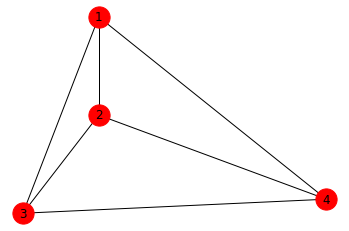

In [11]:
nx.draw_networkx(G,node_pos,node_color='gray',node_size=450)
#Remove the axis 
plt.axis('off')
plt.show()

**Reference:** Ant colony optimization algorithms. *Wikipedia*. https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms